::<center>

# <font color='blue'>**DATA MINING PROJECT**


**TOPIC: MOVIE RECOMMENDATION SYSTEM**

**Instructor:**

| No. | Full Name |
|-------|-------|
| 1 | TS. Cao Thị Nhạn |
| 2 | Ths. Vũ Minh Sang |

**Sinh viên thực hiện**

| No. | Full Name | Student Code |
|-------|-------|-------|
| 1 | Nguyễn Quốc Khánh | 20521452 |
| 2 | Võ Lê Nhã Trang | 20522042 |
| 3 | Nguyễn Ngọc Hải Sơn | 20521846 |

</center>

# **CHAPTER 1. INTRODUCTION**

**Movie Recommendation System** is a problem in the field of recommendation system (recommendation system) to provide recommendations about movies to users based on their preferences, personal information, behavior as well as from available data. available from movies and previous users. This problem is of great importance in helping users discover and search for movies that match their personal preferences conveniently and effectively.

**The importance of the Movie Recommendation System is as follows:**

1. Increase user experience: With a large number of movies being produced daily, finding and selecting the right movie can be a complicated and time consuming task. The movie recommendation system helps users save time and increase the experience by providing movie recommendations tailored to their personal preferences.

2. Increase revenue for movie services: Movie recommendation system helps increase accessibility and discovery for users, thereby increasing consumption and revenue for movie services. By recommending movies that users are likely to be interested in, the recommendation system also plays an important role in generating high viewership and user retention.

3. Improve variety and content discovery: The movie recommendation system helps users discover new and more diverse movies. Instead of just based on popularity, it can make recommendations based on users' similarities, tastes and personal preferences, thereby helping to broaden horizons and find new and interesting movies. taste.

4. For marketing purposes and user interaction: The movie recommendation system can also be used to create marketing campaigns and interact with users. By understanding user preferences and behavior, the system can recommend related movies, create a personalized interactive experience, and increase the marketability of the movies.

**INPUT:**
Users is the user. Items are products, such as movies, songs, books, clips, or other users in the friend recommendation problem.

**OUTPUT:**
The main purpose of Recommender Systems is to predict a user's interest in a certain item, thereby having an appropriate recommendation strategy.

In this project,  we will use a movie dataset that is a part of MovieLens Datasets from Kaggle Dataset can be accessed [here](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset).

**The Movie Dataset** includes many files, these files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.


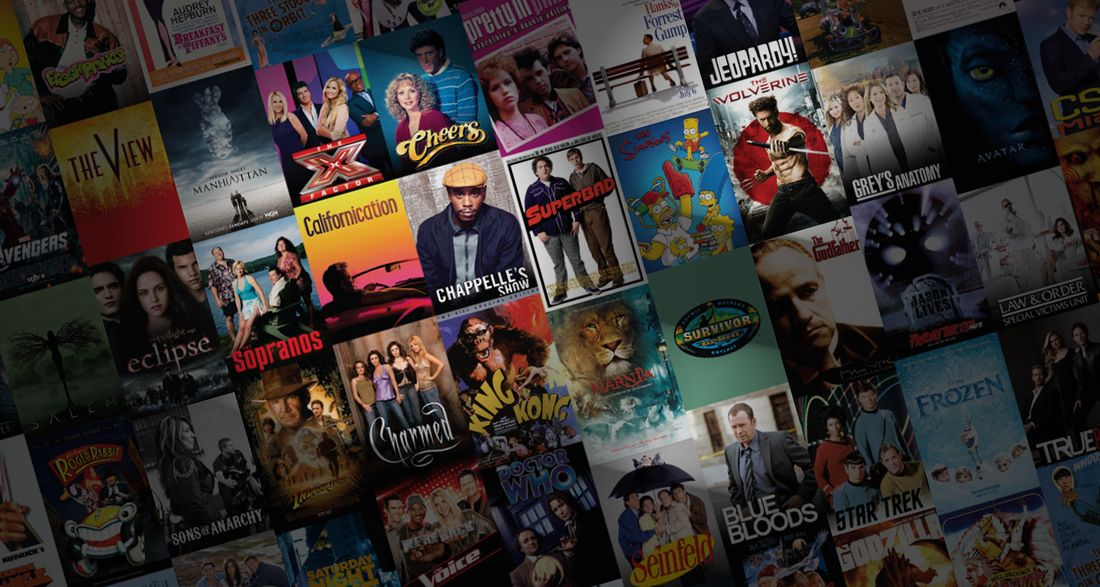

**MovieLens**: MovieLens is a research project and movie recommendation system developed by GroupLens Research at the University of Minnesota. MovieLens provides a dataset containing information about movies, user reviews, and interaction between the user and the movie. The MovieLens dataset has become an important resource for the research and development of movie recommendation algorithms and systems.

**GroupLens**: GroupLens is a research group at the Department of Computer Science and Computer Engineering, University of Minnesota. The GroupLens research team focuses on research and development of recommendation systems and social data analysis. They have made a significant contribution to the field of movie recommendation systems through the development of MovieLens and advanced movie recommendation algorithms and methods.

**TMDB**: TMDB (The Movie Database) is an online database containing information about movies, actors, directors, producers and many other related information. TMDB provides an application programming interface (API) that allows developers to access and use their data to build movie-related applications and systems. TMDB is an important source of information in analyzing and building movie recommendation system based on detailed movie information.

**This dataset is a collection of data collected from TMDB and GroupLens.**

**The Movie dataset** consists of multiple files, which contain metadata for all 45,000 movies listed in the full MovieLens Dataset. The dataset includes movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, gross, posters, release date, language language, manufacturing company, country, TMDB votes, and vote average.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Rating on a scale of 1-5 and taken from the official GroupLens website.

This dataset consists of the following files:

1. **movies_metadata.csv:** The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

2. **keywords.csv:** Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

3. **credits.csv:** Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

4. **links.csv:** The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

5. **links_small.csv:** Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

6. **ratings_small.csv:** The subset of 100,000 ratings from 700 users on 9,000 movies.

# **CHAPTER 2. DATA PREPROCESSING**

**Import libraries**

In [ ]:
!pip install gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import json
%matplotlib inline
import gdown
from sklearn.metrics import mean_squared_error
import zipfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Reading the Data**

**Dowload dataset from [here](https://drive.google.com/file/d/1rIZimDv28zLP78bT-TloeKX-yYAxacig/view?usp=sharing)**

In [ ]:
# Download the ZIP file from Google Drive
url = 'https://drive.google.com/uc?id=1rIZimDv28zLP78bT-TloeKX-yYAxacig'
output = '/content/file.zip'  # Path and name of the file after downloading
gdown.download(url, output, quiet=False)

# Extract the ZIP file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Change the path to the destination folder


Downloading...
From: https://drive.google.com/uc?id=1rIZimDv28zLP78bT-TloeKX-yYAxacig
To: /content/file.zip
100%|██████████| 237M/237M [00:00<00:00, 296MB/s]


In [ ]:
df_credits = pd.read_csv('/content/dataset/Dataset/credits.csv')
df_keywords = pd.read_csv('/content/dataset/Dataset/keywords.csv')
df_metadata = pd.read_csv('/content/dataset/Dataset/movies_metadata.csv', low_memory=False)

df_links = pd.read_csv('/content/dataset/Dataset/keywords.csv')
df_links_small = pd.read_csv('/content/dataset/Dataset/links_small.csv')

df_ratings = pd.read_csv('/content/dataset/Dataset/ratings.csv')
df_ratings_small = pd.read_csv('/content/dataset/Dataset/ratings_small.csv')

In [ ]:
df_links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## **Exploratory Data Analysis (EDA)**

### **View dataset information**

In [ ]:
print('-'*20, ' SHAPES ', '-'*20)
print('1. Ratings: ', df_ratings.shape)
print('2. Links Small: ', df_links_small.shape)
print('3. Credits: ', df_credits.shape)
print('4. Keywords: ', df_keywords.shape)
print('5. Meta Data: ', df_metadata.shape)
print('6. Ratings Small: ', df_ratings_small.shape)
print('7. Links: ', df_links.shape)


print('\n\n')
print('='*20, ' COLUMNS ', '='*20)

print('\n', '-'*20, '1. Ratings ', '-'*20)
print(df_ratings.columns)

print('\n', '-'*20, '2. Links Small ', '-'*20)
print(df_links_small.columns)

print('\n', '-'*20, '3. Credits ', '-'*20)
print(df_credits.columns)

print('\n', '-'*20, '4. Keywords ', '-'*20)
print(df_keywords.columns)

print('\n', '-'*20, '5. Meta Data ', '-'*20)
print(df_metadata.columns)

print('\n', '-'*20, '6. Ratings Small ', '-'*20)
print(df_ratings_small.columns)

print('\n', '-'*20, '7. Links ', '-'*20)
print(df_links.columns)

--------------------  SHAPES  --------------------
1. Ratings:  (26024289, 4)
2. Links Small:  (9125, 3)
3. Credits:  (45476, 3)
4. Keywords:  (46419, 2)
5. Meta Data:  (45466, 24)
6. Ratings Small:  (100004, 4)
7. Links:  (46419, 2)



====================  COLUMNS  ====================

 -------------------- 1. Ratings  --------------------
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

 -------------------- 2. Links Small  --------------------
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

 -------------------- 3. Credits  --------------------
Index(['cast', 'crew', 'id'], dtype='object')

 -------------------- 4. Keywords  --------------------
Index(['id', 'keywords'], dtype='object')

 -------------------- 5. Meta Data  --------------------
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
     

**Movie Metadata Dataset**

> **movies_metadata.csv file** is the main file that contains most of the important information about the movies, such as the title, genres, release date, and budget.

In [ ]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

1.	adult: Indicates if the movie is X-Rated or Adult.
2.	belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
3.	budget: The budget of the movie in dollars.
4.	genres: A stringified list of dictionaries that list out all the genres associated with the movie.
5.	homepage: The Official Homepage of the move.
6.	id: The ID of the move.
7.	imdb_id: The IMDB ID of the movie.
8.	original_language: The language in which the movie was originally shot in.
9.	original_title: The original title of the movie.
10.	overview: A brief blurb of the movie.
11.	popularity: The Popularity Score assigned by TMDB.
12.	poster_path: The URL of the poster image.
13.	production_companies: A stringified list of production companies involved with the making of the movie.
14.	production_countries: A stringified list of countries where the movie was shot/produced in.
15.	release_date: Theatrical Release Date of the movie.
16.	revenue: The total revenue of the movie in dollars.
17.	runtime: The runtime of the movie in minutes.
18.	spoken_languages: A stringified list of spoken languages in the film.
19.	status: The status of the movie (Released, To Be Released, Announced, etc.)
20.	tagline: The tagline of the movie.
21.	title: The Official Title of the movie.
22.	video: Indicates if there is a video present of the movie with TMDB.
23.	vote_average: The average rating of the movie.
24.	vote_count: The number of votes by users, as counted by TMDB.


### **Identify missing values**

In [ ]:
df_metadata.isnull().sum().sort_values(ascending = False)

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
status                      87
release_date                87
imdb_id                     17
original_language           11
spoken_languages             6
title                        6
video                        6
vote_average                 6
revenue                      6
vote_count                   6
popularity                   5
production_companies         3
production_countries         3
original_title               0
id                           0
genres                       0
budget                       0
adult                        0
dtype: int64

### **When Were The Movies Released?**

In [ ]:
df_metadata['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45466, dtype: object

In [ ]:
# Get data
df_test = df_metadata.copy()

# Check if values are in correct datetime format
df_test['is_valid'] = pd.to_datetime(df_test['release_date'], errors='coerce').notna()

# Remove lines with invalid values in column 'release_date'
df_test = df_test[df_test['is_valid']]

df_test['release_date'] = pd.to_datetime(df_test['release_date'])
data = df_test['release_date'].dt.year.value_counts().sort_index()

# Create trace
trace = go.Scatter(x = data.index,
                   y = data.values,
                   marker = dict(color = '#db0000'))
# Create layout
layout = dict(title = '{} Movies Grouped By Year Of Release'.format(df_test.shape[0]),
              xaxis = dict(title = 'Release Year'),
              yaxis = dict(title = 'Movies'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

**The number of movies released increases with the year and the end of the dataset, possibly due to data collection discontinuation**

### **How Are The Ratings Distributed?**

In [ ]:
# Get data
data = df_ratings['rating'].value_counts().sort_index(ascending=False)

# Create trace
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df_ratings.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker = dict(color = '#db0000'))
# Create layout
layout = dict(title = 'Distribution Of {} Ratings'.format(df_ratings.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Dataset movies rarely have a rating lower than three. Most ratings have between three and four stars.
The distribution is probably biased, since only people liking the movies proceed to be customers and others presumably will leave the platform.

### **When Have The Movies Been Rated?**

In [ ]:
# Get data
data = df_test['release_date'].value_counts()
data.index = pd.to_datetime(data.index)
data.sort_index(inplace=True)

# Create trace
trace = go.Scatter(x = data.index,
                   y = data.values,
                   marker = dict(color = '#db0000'))
# Create layout
layout = dict(title = '{} Movie-Ratings Grouped By Day'.format(df_test.shape[0]),
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Ratings'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

The number of ratings is getting higher and higher, users are interested in their ratings, and ratings have a value ranging from 0 to extremely high.

## **Drop Features**

**Columns to be Dropped**
- **original_title**: since title column is also included and original_title column has non-ASCII characters, it can be dropped.
- **homepage**: there will be no analysis depending on the homepage of the movie, this column is uselesss for this specific analysis
- **imdb_id**: both ratings.csv and keywords.csv has id column to match with metadata dataset, thus no need for this column.
- **tagline**: no text analysis will be made in this notebook. For retrieving the most important words, keywords.csv can be used
- **video & poster_path**: no image, video related processing will be made
- **spoken_languages**: original_language is included, no need.
- **adult**: In adult column, only 9 True values are present, this information will not give us anything significant, thus, that column is also dropped.

We will remove the above columns, also remove duplicate rows/columns and any rows/columns of data that are either NaN or null will be removed.

In [ ]:
df_metadata["adult"].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [ ]:
drop_df = ["homepage", "poster_path", "video", "imdb_id", "original_title", "spoken_languages", "tagline", "adult"]
df_metadata = df_metadata.drop(drop_df, axis=1) # drops the selected columns

## **Remove duplicate and NaN/Null rows/columns**

In [ ]:
duplicated_records = df_metadata[df_metadata.duplicated()]
df_metadata = df_metadata.drop_duplicates(keep='first') # removes the duplicates from existing dataframe
df_metadata.dropna(how="all",inplace=True) # if each column is NaN or null in a row, drops this row

**After the above processing, our metadata now has 16 columns and 45,449 rows.**

In [ ]:
df_metadata.shape

(45449, 16)

## **Remove no title columns**

Out of 45449 rows, there are 6 rows with no title. Let's drop that one, too.

In [ ]:
df_metadata.dropna(subset=["title"], inplace=True)

## **Convert object to numeric**

The types of id, popularity and budget is object, although they had to be numeric. Errors will be handled with coerce option, thus invalid parsing will be set as NaN.

In [ ]:
df_metadata["id"] = pd.to_numeric(df_metadata['id'], errors='coerce', downcast="integer")
df_metadata["popularity"] =pd.to_numeric(df_metadata['popularity'], errors='coerce', downcast="float")
df_metadata["budget"] =pd.to_numeric(df_metadata['budget'], errors='coerce', downcast="float")
df_metadata['release_date'] = pd.to_datetime(df_metadata['release_date'])
df_metadata['release_year'] = df_metadata['release_date'].dt.year

## **Convert data**

As we can see from the dataset itself and info() function, **`belongs_to_collection`** column has too many null entries, therefore instead of giving the collection name, we can convert the data to 0 and 1, 0 for not belonging and 1 for belonging.

In [ ]:
df_metadata['belongs_to_collection'] = df_metadata['belongs_to_collection'].fillna("None")
df_metadata['belongs_to_collection'] = (df_metadata['belongs_to_collection'] != "None").astype(int)

## **Handling remaining missing values**

In [ ]:
df_metadata.isnull().sum().sort_values(ascending = False)

overview                 954
runtime                  257
release_year              84
release_date              84
status                    81
original_language         11
revenue                    0
vote_count                 0
vote_average               0
title                      0
belongs_to_collection      0
budget                     0
production_companies       0
popularity                 0
id                         0
genres                     0
production_countries       0
dtype: int64

For **status** column, less than 100 entries are null and it may be a good idea to fill these with most common data. For **runtime**, again a similar case occurs and it can be handled by filling NaN values with the mean.

In [ ]:
df_metadata["status"].fillna(df_metadata["status"].value_counts().idxmax(), inplace=True)
df_metadata["runtime"] = df_metadata["runtime"].replace(0, np.nan)
df_metadata["runtime"].fillna(df_metadata["runtime"].mean(), inplace=True)

In [ ]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45443 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45443 non-null  int64         
 1   budget                 45443 non-null  float64       
 2   genres                 45443 non-null  object        
 3   id                     45443 non-null  int32         
 4   original_language      45432 non-null  object        
 5   overview               44489 non-null  object        
 6   popularity             45443 non-null  float32       
 7   production_companies   45443 non-null  object        
 8   production_countries   45443 non-null  object        
 9   release_date           45359 non-null  datetime64[ns]
 10  revenue                45443 non-null  float64       
 11  runtime                45443 non-null  float64       
 12  status                 45443 non-null  object        
 13  t

Since there are around 70 null release_date entries and **filling that is not logical**, they will be dropped, too. And also 1 row that has null as in column original_language may be dropped.

In [ ]:
df_metadata.dropna(subset=["release_date"],inplace=True)
df_metadata.dropna(subset=["original_language"],inplace=True)

**Now my meta data has run out of missing values**

In [ ]:
df_metadata.isnull().sum().sort_values(ascending = False)

overview                 940
belongs_to_collection      0
release_date               0
vote_count                 0
vote_average               0
title                      0
status                     0
runtime                    0
revenue                    0
production_countries       0
budget                     0
production_companies       0
popularity                 0
original_language          0
id                         0
genres                     0
release_year               0
dtype: int64

## **Converts json list to list**

There are some cells, which have stringified list of json inputs such as **genres, production_companies and production_countries**. For easier processing, these have to be converted into list of inputs. The function below achieves this:

In [ ]:
# converts json list to list of inputs (from the label specified with 'wanted' parameter)
def json_to_arr(cell, wanted = "name"):
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

Let's apply this function to specified 3 parameters:

In [ ]:
df_metadata[['genres']] = df_metadata[['genres']].applymap(json_to_arr)
df_metadata[['production_countries']] = df_metadata[['production_countries']].applymap(lambda row: json_to_arr(row, "iso_3166_1"))
df_metadata[['production_companies']] = df_metadata[['production_companies']].applymap(json_to_arr)

In [ ]:
df_metadata[['genres', 'production_countries','production_companies']].head()

,genres,production_countries,production_companies
0,"[Animation, Comedy, Family]",[US],[Pixar Animation Studios]
1,"[Adventure, Fantasy, Family]",[US],"[TriStar Pictures, Teitler Film, Interscope Co..."
2,"[Romance, Comedy]",[US],"[Warner Bros., Lancaster Gate]"
3,"[Comedy, Drama, Romance]",[US],[Twentieth Century Fox Film Corporation]
4,[Comedy],[US],"[Sandollar Productions, Touchstone Pictures]"


## **Handle Outlier**

Outliers are values that do not match or follow the pattern of the data and can negatively affect the data analysis and modeling process.

### **budget and revenue**

Many entries of **budget and revenue** are 0. However, instead of 0, having NaN is more logical for seeing how many entries are actually available.

In [ ]:
df_metadata['budget'] = df_metadata['budget'].replace(0 , np.nan)
df_metadata['revenue'] = df_metadata['revenue'].replace(0 , np.nan)

In [ ]:
print("Number of rows with budget < 100: ", len((df_metadata[(df_metadata["budget"].notna())&(df_metadata["budget"] < 100)])))
print("Number of rows with budget > 100 and < 1000: ", len(df_metadata[(df_metadata["budget"].notna())&(df_metadata["budget"] > 100)
                                                              &(df_metadata["budget"] < 1000)]))
print("Number of rows with budget > 1000 and < 10000: ", len(df_metadata[(df_metadata["budget"].notna())&(df_metadata["budget"] > 1000)
                                                              &(df_metadata["budget"] < 10000)]))

Number of rows with budget < 100:  137
Number of rows with budget > 100 and < 1000:  101
Number of rows with budget > 1000 and < 10000:  52


There are some rows that have a budget and revenue value, that are not actually scaled. By checking some of the notebooks shared, I have decided to move on with the scaling function below. For example, if the value is 1, then it scales to 1 million. If an example will be given from the true data:
- id: 17402
- Title: Miami Rhapsody
- Production Company: Hollywood Pictures
- Date: 1995-01-27
- Budget: 6
- Revenue: 5 (by looking IMDB, actual revenue can be seen as around 5 million)

In [ ]:
def scale_money(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 10000
    elif num >= 1000 and num < 10000:
        return num *100
    else:
        return num

In [ ]:
df_metadata[['budget', 'revenue']] = df_metadata[['budget', 'revenue']].applymap(scale_money)

After these steps, the columns can be osberved to see how many null or NaN entries there are. So, a heatmap and data is below:

In [ ]:
null_counts = df_metadata.isna().sum()
print(null_counts)

belongs_to_collection        0
budget                   36463
genres                    2383
id                           0
original_language            0
overview                   940
popularity                   0
production_companies     11787
production_countries      6206
release_date                 0
revenue                  37944
runtime                      0
status                       0
title                        0
vote_average                 0
vote_count                   0
release_year                 0
dtype: int64


### **genres and country**

In [ ]:
print("NaN Genres Count: ", df_metadata["genres"].isna().sum())
print("NaN Revenue Count: ", df_metadata["revenue"].isna().sum())
print("NaN Budget Count: ", df_metadata["budget"].isna().sum())
print("NaN Production Company Count: ", df_metadata["production_companies"].isna().sum())
print("NaN Production Country Count: ", df_metadata["production_countries"].isna().sum())

NaN Genres Count:  2383
NaN Revenue Count:  37944
NaN Budget Count:  36463
NaN Production Company Count:  11787
NaN Production Country Count:  6206


For **revenue, budget and production company** filling the values with the most appearing entry or mean is not so logical, since the number of null or NaN entries are huge (More than %20 of whoel dataset). But for **genres and country** it may be done. The function below analyzes the most occuring values for columns in list formats.

In [ ]:
# returns the values and occurance times or "limiter" amount of different parameters in a 2D list
def list_counter(col, limiter = 9999, log = True):
    result = dict()
    for cell in col:
        if isinstance(cell, float):
            continue
        for element in cell:
            if element in result:
                result[element] += 1
            else:
                result[element] = 1
    if log:
        print("Size of words:", len(result))
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
    if log:
        print("Sorted result is:")
    counter = 1
    sum_selected = 0
    total_selected = 0
    rest = 0
    returned = []
    for i in result:
        if counter > limiter:
            total_selected += result[i]
        else:
            counter += 1
            sum_selected += result[i]
            total_selected += result[i]
            if log:
                print(result[i], " - ", i)
            returned.append([i, result[i]])
    if log:
        print("Covered:", sum_selected, "out of", total_selected, "\n")
    return returned

<Axes: xlabel='genres'>

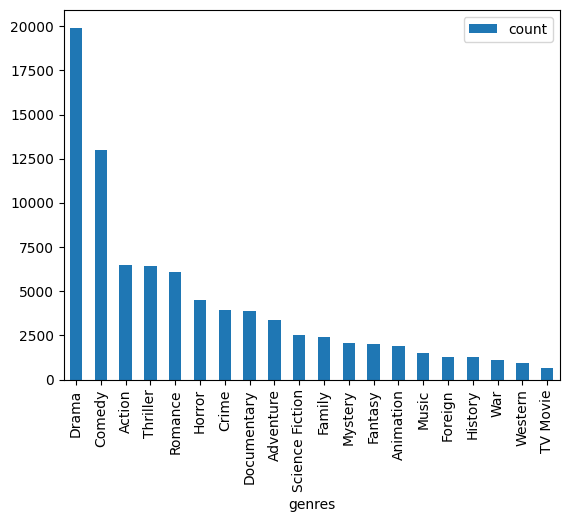

In [ ]:
genres_occur = list_counter(df_metadata["genres"].values, log=False)
genres = pd.DataFrame.from_records(genres_occur, columns=["genres", "count"])
genres.plot(kind = 'bar', x="genres")

<Axes: xlabel='countries'>

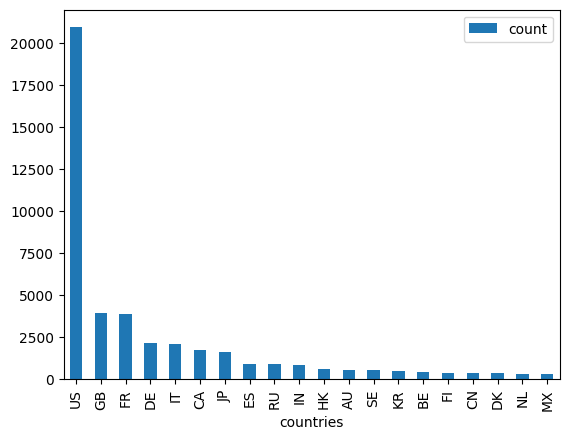

In [ ]:
countries_occur = list_counter(df_metadata["production_countries"].values, log=False)
countries = pd.DataFrame.from_records(countries_occur, columns=["countries", "count"])
countries.head(20).plot(kind = 'bar', x="countries")

In **genres**, **Drama** is the most occurring one with 20189 and in **production_countries**, **US** is the most frequent entry. These can be placed into NA cells of these columns:

In [ ]:
def fill_na_with_list(cell, data):
    if isinstance(cell, float):
        return data
    else:
        return cell

In [ ]:
df_metadata[['genres']] = df_metadata[['genres']].applymap(lambda row:
                                        fill_na_with_list(row, [genres_occur[0][0]]))
df_metadata[['production_countries']] = df_metadata[['production_countries']].applymap(lambda row:
                                        fill_na_with_list(row, [countries_occur[0][0]]))

## **Keyword Data**

In [ ]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


As one can see, **keywords** format is stringified list of json and it can be converted to simple list with using the function written above and problematic ones can be calculated:

In [ ]:
df_keywords["keywords"] = df_keywords[['keywords']].applymap(json_to_arr)

In [ ]:
df_keywords["keywords"]

0                                     [jealousy, toy, boy]
1        [board game, disappearance, based on children'...
2             [fishing, best friend, duringcreditsstinger]
3        [based on novel, interracial relationship, sin...
4                       [baby, midlife crisis, confidence]
                               ...                        
46414                                        [tragic love]
46415                                [artist, play, pinoy]
46416                                                  NaN
46417                                                  NaN
46418                                                  NaN
Name: keywords, Length: 46419, dtype: object

### **Check null values and drop**

In [ ]:
null_counts = df_keywords.isna().sum()
print(null_counts)

id              0
keywords    14795
dtype: int64


In [ ]:
df_keywords.dropna(inplace=True)

### **Merged data**

Since id parameters in both metadata and keywords directing to the same movie, the datasets can be merged.

In [ ]:
df_key_meta = pd.merge(df_metadata, df_keywords, on=['id'], how='left')

In [ ]:
df_key_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45890 entries, 0 to 45889
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45890 non-null  int64         
 1   budget                 8974 non-null   float64       
 2   genres                 45890 non-null  object        
 3   id                     45890 non-null  int32         
 4   original_language      45890 non-null  object        
 5   overview               44941 non-null  object        
 6   popularity             45890 non-null  float32       
 7   production_companies   33983 non-null  object        
 8   production_countries   45890 non-null  object        
 9   release_date           45890 non-null  datetime64[ns]
 10  revenue                7473 non-null   float64       
 11  runtime                45890 non-null  float64       
 12  status                 45890 non-null  object        
 13  t

## **Credit Data**

### **Get Director**

In [ ]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


When it comes to a movie, people often pay attention to the director and their role in the filmmaking process. The director plays a crucial role in shaping the style and ideas of the movie. Therefore, for many film enthusiasts, knowing who the director is can be an important factor in evaluating and choosing to watch a film.

Khi nhắc đến một bộ phim, người ta thường chú ý đến đạo diễn và vai trò của họ trong quá trình làm phim. Đạo diễn đóng một vai trò quan trọng trong việc định hình phong cách và ý tưởng của bộ phim. Vì vậy, đối với nhiều người đam mê điện ảnh, việc biết đạo diễn là ai có thể là một yếu tố quan trọng để đánh giá và lựa chọn xem một bộ phim.

So we will filter out **director** from **crew** and drop **crew** columns.

In [ ]:
def get_director(x):
    x = literal_eval(x)
    for i in x:
        if i == "[]" or isinstance(i, float):
            return np.nan
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df_credits['director'] = df_credits['crew'].apply(get_director)
df_credits['director'] = df_credits['director'].apply(lambda x: [x] if isinstance(x, str) else [])
df_credits.drop(["crew"], axis=1, inplace=True)

In [ ]:
df_credits.head()

,cast,id,director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...",862,[John Lasseter]
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",8844,[Joe Johnston]
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",15602,[Howard Deutch]
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",31357,[Forest Whitaker]
4,"[{'cast_id': 1, 'character': 'George Banks', '...",11862,[Charles Shyer]


Now since cast type is stringified list of json, we can again extract the names from the cast.


In [ ]:
df_credits["cast"] = df_credits[['cast']].applymap(json_to_arr)

In [ ]:
df_credits.head()

,cast,id,director
0,"[Tom Hanks, Tim Allen, Don Rickles]",862,[John Lasseter]
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",8844,[Joe Johnston]
2,"[Walter Matthau, Jack Lemmon, Ann-Margret]",15602,[Howard Deutch]
3,"[Whitney Houston, Angela Bassett, Loretta Devine]",31357,[Forest Whitaker]
4,"[Steve Martin, Diane Keaton, Martin Short]",11862,[Charles Shyer]


If there are cells with both missing cast and director columns, they should be dropped:

In [ ]:
print("Entries with no cast:", len(df_credits[df_credits["cast"].isna()]))
print("Entries with no directors:", len(df_credits[df_credits["director"].isna()]))
print("Entries missing both:", len(df_credits[(df_credits["cast"].isna())&(df_credits["director"].isna())]))
df_credits.drop(df_credits[(df_credits["cast"].isna())&(df_credits["director"].isna())].index, inplace=True)

Entries with no cast: 2418
Entries with no directors: 0
Entries missing both: 0


### **Merged**

The **id** of metadata and **id** of credits columns point to the same movies, thus, both datasets can be converged.

In [ ]:
df_merged = pd.merge(df_key_meta, df_credits, on=['id'], how='left')

In [ ]:
df_merged.shape

(45976, 20)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45976 entries, 0 to 45975
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45976 non-null  int64         
 1   budget                 9010 non-null   float64       
 2   genres                 45976 non-null  object        
 3   id                     45976 non-null  int32         
 4   original_language      45976 non-null  object        
 5   overview               45027 non-null  object        
 6   popularity             45976 non-null  float32       
 7   production_companies   34047 non-null  object        
 8   production_countries   45976 non-null  object        
 9   release_date           45976 non-null  datetime64[ns]
 10  revenue                7505 non-null   float64       
 11  runtime                45976 non-null  float64       
 12  status                 45976 non-null  object        
 13  t

**Merged data has 45.976 entries and 19 columns**

In [ ]:
df_merged.head(10)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,keywords,cast,director
0,1,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[US],1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995.0,"[jealousy, toy, boy]","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995.0,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston]
2,1,NaN,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,NaN,101.0,Released,Grumpier Old Men,6.5,92.0,1995.0,"[fishing, best friend, duringcreditsstinger]","[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch]
3,0,16000000.0,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[US],1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995.0,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker]
4,1,NaN,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995.0,"[baby, midlife crisis, confidence]","[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer]
5,0,60000000.0,"[Action, Crime, Drama]",949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[US],1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0,1995.0,"[robbery, detective, bank]","[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann]
6,0,58000000.0,"[Comedy, Romance]",11860,en,An ugly duckling having undergone a remarkable...,6.677277,"[Paramount Pictures, Scott Rudin Productions, ...","[DE, US]",1995-12-15,NaN,127.0,Released,Sabrina,6.2,141.0,1995.0,"[paris, brother brother relationship, chauffeur]","[Harrison Ford, Julia Ormond, Greg Kinnear]",[Sydney Pollack]
7,0,NaN,"[Action, Adventure, Drama]",45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,[Walt Disney Pictures],[US],1995-12-22,NaN,97.0,Released,Tom and Huck,5.4,45.0,1995.0,NaN,"[Jonathan Taylor Thomas, Brad Renfro, Rachael ...",[Peter Hewitt]
8,0,35000000.0,"[Action, Adventure, Thriller]",9091,en,International action superstar Jean Claude Van...,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[US],1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0,1995.0,"[terrorist, hostage, explosive]","[Jean-Claude Van Damme, Powers Boothe, Dorian ...",[Peter Hyams]
9,1,58000000.0,"[Adventure, Action, Thriller]",710,en,James Bond must unmask the mysterious head of ...,14.686036,"[United Artists, Eon Productions]","[GB, US]",1995-11-16,352194034.0,130.0,Released,GoldenEye,6.6,1194.0,1995.0,"[cuba, falsely accused, secret identity]","[Pierce Brosnan, Sean Bean, Izabella Scorupco]",[Martin Campbell]


In [ ]:
df_merged['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

# **CHAPTER 3. MODEL BUILDING**

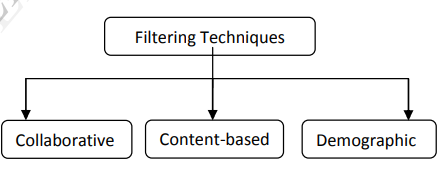

## **Demographic Filtering**

The Simple Recommender offers generalized recommnendations to every user based on movie popularity and (sometimes) genre. The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience. This model does not give personalized recommendations based on the user.

The implementation of this model is extremely trivial. All we have to do is sort our movies based on ratings and popularity and display the top movies of our list. As an added step, we can pass in a genre argument to get the top movies of a particular genre.

In [ ]:
df = df_merged

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45976 entries, 0 to 45975
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45976 non-null  int64         
 1   budget                 9010 non-null   float64       
 2   genres                 45976 non-null  object        
 3   id                     45976 non-null  int32         
 4   original_language      45976 non-null  object        
 5   overview               45027 non-null  object        
 6   popularity             45976 non-null  float32       
 7   production_companies   34047 non-null  object        
 8   production_countries   45976 non-null  object        
 9   release_date           45976 non-null  datetime64[ns]
 10  revenue                7505 non-null   float64       
 11  runtime                45976 non-null  float64       
 12  status                 45976 non-null  object        
 13  t

In [ ]:
df['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45971        [Drama, Action, Romance]
45972                         [Drama]
45973       [Action, Drama, Thriller]
45974                         [Drama]
45975                         [Drama]
Name: genres, Length: 45976, dtype: object

I use the [IMDB Ratings](https://www.imdb.com/chart/top?ref_=nb_mv_3_chttp) to come up with our **Top Movies Chart.** I will use IMDB's *weighted rating* formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
* *v* is the number of votes for the movie
* *m* is the minimum votes required to be listed in the chart
* *R* is the average rating of the movie
* *C* is the mean vote across the whole report

The next step is to determine an appropriate value for *m*, the minimum votes required to be listed in the chart. We will use **95th percentile** as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

I will build our overall Top 250 Chart and will define a function to build charts for a particular genre. Let's begin!

### **Based on movie popularity**

**Finding C - mean vote across the whole report**

In [ ]:
vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.249303984687663

**Finding m -is the minimum votes required to be listed in the chart**

In [ ]:
m = vote_counts.quantile(0.95)
m


432.0

In [ ]:
df['release_date']

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45971   1991-05-13
45972   2011-11-17
45973   2003-08-01
45974   1917-10-21
45975   2017-06-09
Name: release_date, Length: 45976, dtype: datetime64[ns]

In [ ]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

df['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45971    1991
45972    2011
45973    2003
45974    1917
45975    2017
Name: year, Length: 45976, dtype: object

In [ ]:
qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull())
          & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]

qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2301, 6)

Therefore, to qualify to be considered for the chart, a movie has to have at least **432 votes** on TMDB. We also see that the average rating for a movie on TMDB is **5.249** on a scale of 10. **2301** Movies qualify to be on our chart.


In [ ]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)


qualified = qualified.sort_values('wr', ascending=False).head(250)

qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr
15526,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction]",7.918088
12518,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime]",7.906440
22915,Interstellar,2014,11187,8,32.213482,"[Adventure, Drama, Science Fiction]",7.897728
2852,Fight Club,1999,9678,8,63.869598,[Drama],7.882463
4876,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070724,"[Adventure, Fantasy, Action]",7.872555
292,Pulp Fiction,1994,8670,8,140.950241,"[Thriller, Crime]",7.869446
314,The Shawshank Redemption,1994,8358,8,51.645405,"[Drama, Crime]",7.864812
7024,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,"[Adventure, Fantasy, Action]",7.862751
351,Forrest Gump,1994,8147,8,48.307194,"[Comedy, Drama, Romance]",7.861487
5836,The Lord of the Rings: The Two Towers,2002,7641,8,29.423536,"[Adventure, Fantasy, Action]",7.852806


We see that three Christopher Nolan Films, **Inception**, **The Dark Knight** and **Interstellar** occur at the very top of our chart. The chart also indicates a strong bias of TMDB Users towards particular genres and directors.

### **Based on movie genre**

Let us now construct our function that builds charts for particular genres. For this, we will use relax our default conditions to the **85th** percentile instead of **95**.

In [ ]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genres'
gen_md = df.drop('genres', axis=1).join(s)

In [ ]:
def build_chart(genre, percentile=0.85):
    df = gen_md[gen_md['genres'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)

    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull())
              & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]

    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')

    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m)
              * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)

    qualified = qualified.sort_values('wr', ascending=False).head(250)

    return qualified

### **Top Romance Movies**

In [ ]:
build_chart('Romance').head(15)

,title,year,vote_count,vote_average,popularity,wr
10338,Dilwale Dulhania Le Jayenge,1995,661,9,34.457024,8.597506
351,Forrest Gump,1994,8147,8,48.307194,7.973699
880,Vertigo,1958,1162,8,18.208220,7.826140
40790,Your Name.,2016,1030,8,34.461250,7.805521
887,Some Like It Hot,1959,835,8,11.845107,7.764210
1139,Cinema Paradiso,1988,834,8,14.177005,7.763953
19942,Paperman,2012,734,8,7.198633,7.735061
38411,Sing Street,2016,669,8,10.672862,7.712161
886,The Apartment,1960,498,8,11.994281,7.627444
39265,The Handmaiden,2016,453,8,16.727406,7.596166


**We can see that three Dilwale Dulhania Le Jayenge, Forrest Gump and Vertigo occur at the very top of our chart.**

Đề xuất mà chúng tôi đã xây dựng trong phần trước gặp phải một số hạn chế nghiêm trọng. Thứ nhất, nó đưa ra đề xuất giống nhau cho mọi người, bất kể sở thích cá nhân của người dùng. Nếu một người yêu thích phim lãng mạn (và ghét hành động) nhìn vào Bảng xếp hạng 15 phim hàng đầu của chúng tôi, thì có lẽ họ sẽ không thích hầu hết các phim. Nếu họ tiến thêm một bước và xem xét các biểu đồ của chúng tôi theo thể loại, thì họ vẫn sẽ không nhận được đề xuất tốt nhất.

Chẳng hạn, hãy xem xét một người yêu thích Dilwale Dulhania Le Jayenge, Tên tôi là Khan và Kabhi Khushi Kabhi Gham. Một suy luận mà chúng ta có thể nhận được là người đó yêu nam diễn viên Shahrukh Khan và đạo diễn Karan Johar. Ngay cả khi cô ấy/anh ấy truy cập biểu đồ lãng mạn, cô ấy/cô ấy sẽ không thấy đây là những gợi ý hàng đầu.

Để cá nhân hóa các đề xuất của chúng tôi nhiều hơn, tôi sẽ xây dựng một công cụ tính toán độ tương tự giữa các phim dựa trên các số liệu nhất định và đề xuất các phim giống nhất với một phim cụ thể mà người dùng thích. Vì chúng tôi sẽ sử dụng siêu dữ liệu phim (hoặc nội dung) để xây dựng công cụ này, nên công cụ này còn được gọi là Lọc dựa trên nội dung.

## **Content-based Filtering**

**Content-based filtering** uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.


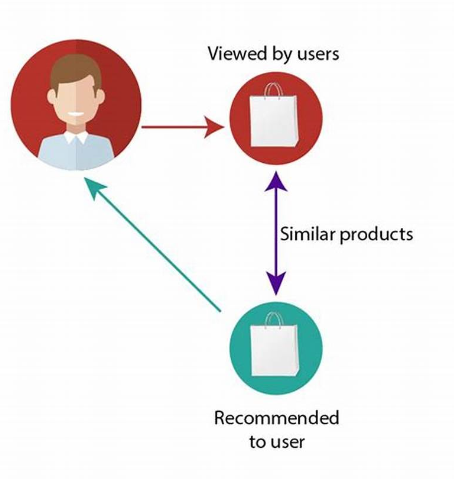

The recommender we built in the previous section suffers some severe limitations. For one, it gives the same recommendation to everyone, regardless of the user's personal taste. If a person who loves romantic movies (and hates action) were to look at our Top 15 Chart, s/he wouldn't probably like most of the movies. If s/he were to go one step further and look at our charts by genre, s/he wouldn't still be getting the best recommendations.

For instance, consider a person who loves Dilwale Dulhania Le Jayenge, My Name is Khan and Kabhi Khushi Kabhi Gham. One inference we can obtain is that the person loves the actor Shahrukh Khan and the director Karan Johar. Even if s/he were to access the romance chart, s/he wouldn't find these as the top recommendations.

To personalise our recommendations more, I am going to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. Since we will be using movie metadata (or content) to build this engine, this also known as **Content Based Filtering**.

I will build **Content Based Recommenders** based on:

1. **Movie Overviews + Movie Cast, Crew, Keywords and Genre**

Also, as mentioned in the introduction, I will be using a subset of all the movies available to us due to limiting computing power available to me.

### **Movie Description + Metadata Based Recommender**

I will be using a subset of all the movies available to us due to limiting computing power available to me.

In [ ]:
links_small = pd.read_csv('/content/dataset/Dataset/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

md = df
md = md.drop([19730, 29503, 35587])
md['id'] = md['id'].astype('int')

In [ ]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9178, 21)

We have 9178 movies avaiable in our small movies metadata dataset which is 5 times smaller than our original dataset of 45000 movies.

In [ ]:
df = smd

**Turn the overview into a list of words**

In [ ]:
df['overview'] = df['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])

<ipython-input-68-d1228430abc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])


**Remove whitespace**

In [ ]:
df['genres'] = df['genres'].apply(lambda x:[i.replace(" ","") for i in x])
df['cast'] = df['cast'].apply(lambda x: [i.replace(" ", "") for i in x] if isinstance(x, list) else [])
df['keywords'] = df['keywords'].apply(lambda x:[i.replace(" ","") for i in x] if isinstance(x, list) else [])
df['director'] = df['director'].apply(lambda x:[i.replace(" ","") for i in x] if isinstance(x, list) else [])

<ipython-input-69-df93f96fb30e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].apply(lambda x:[i.replace(" ","") for i in x])
<ipython-input-69-df93f96fb30e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast'] = df['cast'].apply(lambda x: [i.replace(" ", "") for i in x] if isinstance(x, list) else [])
<ipython-input-69-df93f96fb30e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

**Creating a metadata dump for every movie which consists of genres, director, actors and keywords**

In [ ]:
df['tags'] = df['overview']+ df['genres']+ df['keywords'] +df['cast'] + df['director']

<ipython-input-70-a971d41d644d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['overview']+ df['genres']+ df['keywords'] +df['cast'] + df['director']


In [ ]:
df['tags']

0        [Led, by, Woody,, Andy's, toys, live, happily,...
1        [When, siblings, Judy, and, Peter, discover, a...
2        [A, family, wedding, reignites, the, ancient, ...
3        [Cheated, on,, mistreated, and, stepped, on,, ...
4        [Just, when, George, Banks, has, recovered, fr...
                               ...                        
45336    [When, Molly, Hale's, sadness, of, her, father...
45341    [All, your, favorite, Pokémon, characters, are...
45342    [All, your, favorite, Pokémon, characters, are...
45343    [All, your, favorite, Pokémon, characters, are...
45344    [All, your, favorite, Pokémon, characters, are...
Name: tags, Length: 9178, dtype: object

**View tags with id and title**

In [ ]:
new_df = df[['id', 'title', 'tags']]
new_df

,id,title,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ..."
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr..."
...,...,...,...
45336,10991,Pokémon: Spell of the Unknown,"[When, Molly, Hale's, sadness, of, her, father..."
45341,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"[All, your, favorite, Pokémon, characters, are..."
45342,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"[All, your, favorite, Pokémon, characters, are..."
45343,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"[All, your, favorite, Pokémon, characters, are..."


**Convert tags element to string**

In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x:' '.join(x))

<ipython-input-73-68a616cd60db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:' '.join(x))


In [ ]:
new_df

,id,title,tags
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45336,10991,Pokémon: Spell of the Unknown,When Molly Hale's sadness of her father's disa...
45341,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"All your favorite Pokémon characters are back,..."
45342,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"All your favorite Pokémon characters are back,..."
45343,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"All your favorite Pokémon characters are back,..."


**Use a Count Vectorizer to create our count matrix**

In [ ]:
new_df['tags'][0]
new_df['tags'] = new_df['tags'].apply(lambda X:X.lower())
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')


<ipython-input-75-4b4d7339923d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda X:X.lower())


In [ ]:
cv.fit_transform(new_df['tags']).toarray().shape

(9178, 5000)

In [ ]:
count_matrix  = cv.fit_transform(new_df['tags']).toarray()

**Convert every word to its stem so that words such as Dogs and Dog are considered the same.**

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
ps.stem('Dogs')

'dog'

In [ ]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
new_df['tags'] = new_df['tags'].apply(stem)

<ipython-input-81-be18a4346d89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


**Calculate the cosine similarities**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(count_matrix).shape

(9178, 9178)

In [ ]:
similarity = cosine_similarity(count_matrix)

**Sample similarity**

In [ ]:
similarity[0]

array([1.        , 0.04397995, 0.04796011, ..., 0.03289165, 0.03289165,
       0.03289165])

In [ ]:
similarity[0].shape

(9178,)

In [ ]:
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x:x[1])[1:6]

[(2510, 0.48423735461324846),
 (7571, 0.45560568900151466),
 (6221, 0.3174936728480899),
 (8455, 0.20756952180649918),
 (6443, 0.18248971940174205)]

**Build function according to similarity**

In [ ]:
def recommend_contentbased(movie):
  movie_index = new_df[new_df['title']==movie].index[0]
  distances = similarity[movie_index]
  movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:31]
  for i in movies_list:
    print(new_df.iloc[i[0]].title)

**Result**

In [ ]:
recommend_contentbased('The Godfather')

Prince Valiant
All Dogs Go to Heaven 2
Our Hospitality
Mr. Bean's Holiday
Miss Violence
A Knight's Tale
The Jungle Book
Ae Fond Kiss...
Nicholas Nickleby
The Land Before Time
James and the Giant Peach
For the Love of Benji
The Associate
Knife in the Water
The Secret Adventures of Tom Thumb
The Boxtrolls
Princess Mononoke
A Christmas Story
Once Upon a Forest
Waiting for 'Superman'
The Fern Flower
Mr. Peabody & Sherman
Bogus
The Polar Express
Over the Hedge
The Flight of Dragons
A Little Romance
Dinosaur
Written on the Wind
Finding Nemo


***The recommendations seem to have recognized other Christopher Nolan movies (due to the high weightage given to director) and put them as top recommendations.***

## **Collaborative Filtering (CF)**

### **User-based Collaborative Filtering**

**Collaborative filtering** is making recommendations based on a combination of your experience and the experiences of others.

CF builds user profiles based on activities such as reviews, viewings, purchases, or other interactions with targets. When a user requests suggestions, CF compares the user's profile with the profiles of other users to find users with similar interests. Then, the goals that similar users have interacted with will be suggested to the current user.


One advantage of CF is its ability to suggest goals based on the user's actual interests, because it considers the actual interaction between the user and the targets. In addition, CF is also capable of suggesting new or lesser-known targets, as it is based on the activity of the entire user community.

However, CF also has some limitations. First, it depends on the interaction between the user and the target, so if the user is new or does not have much interaction, it is difficult to generate an accurate suggestion. Second, the CF does not consider information about the content of the targets, which can lead to suggesting content-inappropriate targets.

Compare with Content-based Filtering (CBF):

CF focuses on user interaction and goals, while CBF focuses on content information of targets.
CF is based on similarity between users, while CBF is based on content similarity of targets.
CF has the ability to suggest targets based on actual user interactions, while CBF has the ability to suggest new or lesser known targets based on similar content.
CF may have difficulty generating suggestions for new or less engaged users, while CBF does not depend on interaction history and can recommend based on content information.

1. User Based Collaborative Filtering
    * Collaborative filtering is making recommend according to combination of your experience and experiences of other people.
    * First we need to make user vs item matrix.
        * Each row is users and each columns are items like movie, product or websites
    * Secondly, computes similarity scores between users.
        * Each row is users and each row is vector.
        * Compute similarity of these rows (users).
    * Thirdly, find users who are similar to you based on past behaviours
    * Finally, it suggests that you are not experienced before.
    * Lets make an example of user based collaborative filtering
        * Think that there are two people
        * First one watched 2 movies that are lord of the rings and hobbit
        * Second one watched only lord of the rings movie
        * User based collaborative filtering computes similarity of these two people and sees both are watched a lord of the rings.
        * Then it recommends hobbit movie to second one as it can be seen picture

      <a href="https://ibb.co/droZMy"><img src="https://images.viblo.asia/71fae471-2dfd-4490-9440-d54a471b20b4.png" alt="resim_a" border="0"></a>

    * User based collaborative filtering has some problems
        * In this system, each row of matrix is user. Therefore, comparing and finding similarity between of them is computationaly hard and spend too much computational power.
        * Also, habits of people can be changed. Therefore making correct and useful recommendation can be hard in time.
    * In order to solve these problems, lets look at another recommender system that is item based collaborative filtering

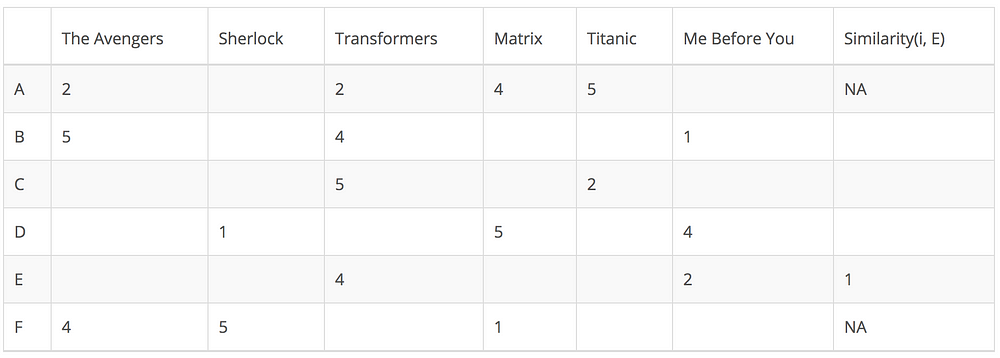

####Creation of User-Movie DF

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [ ]:
df_links_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
merge = df_links_small.merge(df_ratings, how='left', on='movieId')

In [ ]:
merge = merge.rename(columns={'tmdbId':'id'})

In [ ]:
merge.head()

,movieId,imdbId,id,userId,rating,timestamp
0,1,114709,862.0,8.0,4.0,1.013444e+09
1,1,114709,862.0,9.0,4.5,1.073837e+09
2,1,114709,862.0,12.0,4.0,9.439122e+08
3,1,114709,862.0,20.0,4.0,1.368361e+09
4,1,114709,862.0,24.0,4.0,9.798699e+08


In [ ]:
df1= df.merge(merge, on='id', how='left')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25140153 entries, 0 to 25140152
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   belongs_to_collection  int64         
 1   budget                 float64       
 2   genres                 object        
 3   id                     int64         
 4   original_language      object        
 5   overview               object        
 6   popularity             float32       
 7   production_companies   object        
 8   production_countries   object        
 9   release_date           datetime64[ns]
 10  revenue                float64       
 11  runtime                float64       
 12  status                 object        
 13  title                  object        
 14  vote_average           float64       
 15  vote_count             float64       
 16  release_year           float64       
 17  keywords               object        
 18  cast                

In [ ]:
new_df1 = df1[[ 'movieId', 'title', 'userId', 'rating', 'timestamp']]

In [ ]:
new_df1 = new_df1.dropna()

In [ ]:
new_df1.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story,8.0,4.0,1.013444e+09
1,1,Toy Story,9.0,4.5,1.073837e+09
2,1,Toy Story,12.0,4.0,9.439122e+08
3,1,Toy Story,20.0,4.0,1.368361e+09
4,1,Toy Story,24.0,4.0,9.798699e+08


In [ ]:
count = pd.DataFrame(new_df1['title'].value_counts())
count

,title
Forrest Gump,91921
The Shawshank Redemption,91082
Pulp Fiction,87901
The Silence of the Lambs,84078
The Matrix,77960
...,...
Descongelate!,1
Once My Mother,1
El vals de los inútiles,1
Life Is Sacred,1


In [ ]:
def create_user_movie_df():
    comment_counts = pd.DataFrame(new_df1["title"].value_counts())
    rare_movies = comment_counts[comment_counts["title"] <= 10000].index
    common_movies = new_df1[~new_df1["title"].isin(rare_movies)]
    user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
    return user_movie_df


In [ ]:
user_movie_df = create_user_movie_df()
user_movie_df.shape

(262936, 646)

In [ ]:
# User to recommend
import pandas as pd

# Kiểm tra DataFrame user_movie_df
if user_movie_df.empty:
    print("DataFrame user_movie_df is empty.")
else:
    # Lấy ngẫu nhiên một người dùng từ DataFrame user_movie_df
    random_user = user_movie_df.sample(1, random_state=45).index[0]
    print("Random user:", random_user)

Random user: 130957.0


In [ ]:
# I select the part of the data set that interests your user.
# Movies watched by the user.
random_user_df = user_movie_df[user_movie_df.index == random_user]

# Bring non-NAs.
movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
movies_watched #List of watched movies.

['A Few Good Men',
 'Blood Diamond',
 'Bruce Almighty',
 'Casino Royale',
 'Die Hard',
 'Dirty Dancing',
 'Fight Club',
 'Ghost',
 'Grease',
 'Groundhog Day',
 'Happy Gilmore',
 'Inception',
 'Independence Day',
 'Memento',
 'Moulin Rouge!',
 "My Best Friend's Wedding",
 'Notting Hill',
 'Pretty Woman',
 'Sleepless in Seattle',
 'Taken',
 'The 40 Year Old Virgin',
 'The Bourne Identity',
 'The Bourne Supremacy',
 'The Bourne Ultimatum',
 'The Dark Knight',
 'The Dark Knight Rises',
 'The Fifth Element',
 'The Girl with the Dragon Tattoo',
 'The Hangover',
 'The Italian Job',
 "The King's Speech",
 'Titanic',
 'Top Gun',
 'True Lies',
 'West Side Story']

In [ ]:
len(movies_watched)

35

In [ ]:
# We wonder how many ratings the user gave the movie "Silence of the Lambs, The (1991)".
user_movie_df.loc[user_movie_df.index == random_user,user_movie_df.columns == "Titanic"]

title,Titanic
userId,
130957.0,4.0


#### Other Users Watching the Same Movies

In [ ]:
movies_watched_df = user_movie_df[movies_watched]
movies_watched_df.iloc[0:10, 0:10]

title,A Few Good Men,Blood Diamond,Bruce Almighty,Casino Royale,Die Hard,Dirty Dancing,Fight Club,Ghost,Grease,Groundhog Day
userId,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# From here we want to select only those who have watched at least 20 joint movies with our user.
# For this, we want to access the information about how many movies our other users have watched.
# Threshold values to be determined here are relative. It may vary.
user_movie_count = movies_watched_df.T.notnull().sum()
user_movie_count = user_movie_count.reset_index()
user_movie_count.columns = ["userId", "movie_count"]
# At least 20 joint films
user_movie_count[user_movie_count["movie_count"] > 20].sort_values("movie_count", ascending=False)

,userId,movie_count
236296,243443.0,35
86446,89020.0,35
95552,98415.0,35
190851,196541.0,35
92350,95112.0,35
...,...,...
24176,24891.0,21
113475,116847.0,21
227348,234214.0,21
167103,172092.0,21


In [ ]:
# For example, if we want to see other users who have watched all the movies the user has watched.
user_movie_count[user_movie_count["movie_count"] == 35].count()

userId         22
movie_count    22
dtype: int64

In [ ]:
users_same_movies = user_movie_count[user_movie_count["movie_count"] > 20]["userId"]

#### Determination of Similarity: correlation matrix

In [ ]:
# We combine the data of our user and others to see the correlation.
# We will identify the most similar ones.
final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],
                      random_user_df[movies_watched]])

In [ ]:
# We add users to the columns for easier operation.
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
# After combining all the data, let's take the correlation and make it more readable.
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df.head()
## Correlations for all users.

,user_id_1,user_id_2,corr
0,4219.0,27310.0,-0.970363
1,237187.0,197718.0,-0.944545
2,18274.0,206863.0,-0.943381
3,194386.0,152455.0,-0.942852
4,73496.0,225582.0,-0.934470


In [ ]:
# We only need correlations that concern our selected user.
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.70)][["user_id_2", "corr"]].reset_index(drop=True)

# Let's see other users who have a correlation of 70% or more with our user. The applied filter changes accordingly.
top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_id_2": "userId"}, inplace=True)

top_users.head(20)
# We identified our users who showed the most like behavior with our user.
# Now let's find out how many points these users give to which movie.

,userId,corr
4,130957.0,1.000000
3,264953.0,0.884815
2,267174.0,0.811325
1,16848.0,0.724266
0,201834.0,0.702205


In [ ]:
top_users_ratings = top_users.merge(df_ratings[["userId", "movieId", "rating"]], how='inner')
# Users with the highest correlation with our user and their ratings for movies:
top_users_ratings = top_users_ratings[top_users_ratings["userId"] != random_user]
top_users_ratings.head(10)

,userId,corr,movieId,rating
54,264953.0,0.884815,1,5.0
55,264953.0,0.884815,3,4.0
56,264953.0,0.884815,5,3.0
57,264953.0,0.884815,10,4.0
58,264953.0,0.884815,11,3.0
59,264953.0,0.884815,31,3.5
60,264953.0,0.884815,34,3.0
61,264953.0,0.884815,39,3.0
62,264953.0,0.884815,47,3.0
63,264953.0,0.884815,50,5.0


#### **Weighted Average Recommendation Score Calculation**

In [ ]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']

recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"}).reset_index()
recommendation_df.head(10)

,movieId,weighted_rating
0,1,3.250524
1,2,2.270294
2,3,3.539261
3,5,2.544210
4,7,3.089930
5,10,3.174040
6,11,2.767634
7,15,0.811325
8,16,2.839636
9,17,4.056623


In [ ]:
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.5].sort_values("weighted_rating", ascending=False)
movies_to_be_recommend.head(10)

,movieId,weighted_rating
872,3548,4.424076
426,1617,4.424076
1521,31116,4.424076
393,1396,4.424076
336,1267,4.424076
142,515,4.424076
921,3811,4.424076
234,955,4.424076
312,1224,4.424076
198,898,4.424076


In [ ]:
movies_to_be_recommend.merge(new_df1[["movieId", "title"]]).

,movieId,weighted_rating,title
0,3548,4.424076,Auntie Mame
1,3548,4.424076,Auntie Mame
2,3548,4.424076,Auntie Mame
3,3548,4.424076,Auntie Mame
4,3548,4.424076,Auntie Mame
...,...,...,...
3931555,5013,3.509899,Gosford Park
3931556,5013,3.509899,Gosford Park
3931557,5013,3.509899,Gosford Park
3931558,5013,3.509899,Gosford Park


### **Item-based Collaborative Filtering**

In this system, instead of finding relationships between users, used items such as movies or content are compared with each other.

In user-based recommendation systems, the user's habits can be changed. This situation makes recommendations difficult. However, in item-based recommendation systems, the movie or asset doesn't change. Hence recommendation is easier.

On the other hand, there are almost 7 billion people worldwide. Comparing people increases computing power. However, if the items are compared, the computing power will be less.

In item based recommendation systems we need to create a user vs item matrix which we also use in user based recommendation systems.

Each row is a user, and each column is an item such as a movie, product, or website.
However, now instead of calculating similarity between rows, we need to calculate similarity between columns that are items like movies or content.

2. Item Based Collaborative Filtering
    * In this system, instead of finding relationship between users, used items like movies or stuffs are compared with each others.
    * In user based recommendation systems, habits of users can be changed. This situation makes hard to recommendation. However, in item based recommendation systems, movies or stuffs does not change. Therefore recommendation is easier.
    * On the other hand, there are almost 7 billion people all over the world. Comparing people increases the computational power. However, if items are compared, computational power is less.
    * In item based recommendation systems, we need to make user vs item matrix that we use also in user based recommender systems.
        * Each row is user and each column is items like movie, product or websites.
        * However, at this time instead of calculating similarity between rows, we need to calculate similarity between columns that are items like movies or stuffs.
    * Lets look at how it is works.
        * Firstly, there are similarities between lord of the rings and hobbit movies because both are liked by three different people. There is a similarity point between these two movies.
        * If the similarity is high enough, we can recommend hobbit to other people who only watched lord of the rings movie as it can be seen in figure below.
        *<a href="https://imgbb.com/"><img src="https://image.ibb.co/maEQdd/resim_b.jpg" alt="resim_b" border="0"></a>

In [ ]:
new_df2 = df1[["movieId", "title", "userId", "rating","timestamp"]]
new_df2.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story,8.0,4.0,1.013444e+09
1,1,Toy Story,9.0,4.5,1.073837e+09
2,1,Toy Story,12.0,4.0,9.439122e+08
3,1,Toy Story,20.0,4.0,1.368361e+09
4,1,Toy Story,24.0,4.0,9.798699e+08


In [ ]:
new_df2.shape

(25140153, 5)

In [ ]:
new_df2["title"].nunique()

8809

In [ ]:
new_df2['title'].value_counts().head(20)


Forrest Gump                  91921
The Shawshank Redemption      91082
Pulp Fiction                  87901
The Silence of the Lambs      84078
The Matrix                    77960
Star Wars                     77045
Jurassic Park                 74355
Schindler's List              67662
Braveheart                    66512
Toy Story                     66008
Return of the Jedi            62714
Terminator 2: Judgment Day    61836
The Empire Strikes Back       61672
Fight Club                    60024
Raiders of the Lost Ark       59693
The Usual Suspects            59271
American Beauty               57879
Apollo 13                     57416
Independence Day              57232
The Godfather                 57070
Name: title, dtype: int64

In [ ]:
toy_story_count = new_df2.loc[new_df2['title'] == 'Toy Story', 'title'].value_counts()

print(toy_story_count)

Toy Story    66008
Name: title, dtype: int64


In [ ]:
new_df2.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story,8.0,4.0,1.013444e+09
1,1,Toy Story,9.0,4.5,1.073837e+09
2,1,Toy Story,12.0,4.0,9.439122e+08
3,1,Toy Story,20.0,4.0,1.368361e+09
4,1,Toy Story,24.0,4.0,9.798699e+08


In [ ]:
comment_counts = pd.DataFrame(new_df2["title"].value_counts())
rare_movies = comment_counts[comment_counts["title"] <= 30000].index
common_movies = new_df2[~new_df2["title"].isin(rare_movies)]
common_movies.shape
common_movies["title"].nunique()

107

In [ ]:
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
user_movie_df.shape

(226487, 107)

####Making Movie Recommendations

In [ ]:
movie_name = "Toy Story"
movie_name = user_movie_df[movie_name]
user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(10)

title
Toy Story               1.000000
Monsters, Inc.          0.551106
Finding Nemo            0.527777
Aladdin                 0.446276
The Lion King           0.433166
Shrek                   0.418351
Beauty and the Beast    0.414729
Babe                    0.394694
Back to the Future      0.372224
Jurassic Park           0.361102
dtype: float64

In [ ]:
movie_name = pd.Series(user_movie_df.columns).sample(1).values[0]
movie_name = user_movie_df[movie_name]
user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(10)

title
The Lord of the Rings: The Two Towers                     1.000000
The Lord of the Rings: The Return of the King             0.904031
The Lord of the Rings: The Fellowship of the Ring         0.889493
Return of the Jedi                                        0.393065
The Empire Strikes Back                                   0.389512
Star Wars                                                 0.389399
Pirates of the Caribbean: The Curse of the Black Pearl    0.364082
X-Men                                                     0.355445
Gladiator                                                 0.346606
Spider-Man                                                0.331203
dtype: float64

In [ ]:
def check_film(keyword, user_movie_df):
    return [col for col in user_movie_df.columns if keyword in col]

check_film("Lord", user_movie_df)

['The Lord of the Rings: The Fellowship of the Ring',
 'The Lord of the Rings: The Return of the King',
 'The Lord of the Rings: The Two Towers']

### **Single Value Decomposition - SVD**

* https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook#Collaborative-Filtering
* https://www.kaggle.com/code/padmanabhanporaiyar/imdb-movies-all-types-of-recommender-system#Model-Based-Recommender-Systems


Model-Based Collaborative Filtering (model-based CBF): This model uses machine learning algorithms to build a comprehensive model from historical user data and movie reviews. This model predicts user preferences for unwatched movies based on relationships and patterns in the data. This allows for more personalized movie recommendations and improved predictability.

RMSE (Root Mean Square Error) and MAE (Mean Absolute Error) are two indexes used to evaluate the performance of the model in movie recommendation problem, as well as in many other prediction problems.

The RMSE measures the difference between the predicted and actual values, and the smaller it is, the more accurate the model is.

The MAE also measures the difference between the predicted and actual values, but instead of averaging the squares of the differences, the MAE averages the absolute values of the differences.

MAE also measures the difference between the predicted and actual values, but is not concerned with the direction of the difference, only the extent of the difference. The smaller the MAE value, the more accurate the prediction model.

Both RMSE and MAE are measures of model error, and should be kept as low as possible. However, in some cases, RMSE is more often used for model evaluation than MAE, especially when larger differences can seriously affect the results.

In [ ]:
!pip install scikit-surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
# Initialize a surprise reader object
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,5), skip_lines=1)
movie_md = pd.read_csv("/content/dataset/Dataset/movies_metadata.csv")
ratings = pd.read_csv('/content/dataset/Dataset/ratings_small.csv')

# movie dataframe with votes more than 55
movie_md = movie_md[movie_md['vote_count']>55][['id','title']]

# IDs of movies with count more than 55
movie_ids = [int(x) for x in movie_md['id'].values]

# Select ratings of movies with more than 55 counts
ratings = ratings[ratings['movieId'].isin(movie_ids)]

# Reset Index
ratings.reset_index(inplace=True, drop=True)

# Print first 5 rows
ratings.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-130-861f8e8a131a>:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_md = pd.read_csv("/content/dataset/Dataset/movies_metadata.csv")


,userId,movieId,rating,timestamp
0,1,1371,2.5,1260759135
1,1,2105,4.0,1260759139
2,1,2294,2.0,1260759108
3,2,17,5.0,835355681
4,2,62,3.0,835355749


Note that in this dataset movies are rated on a scale of 5 unlike the earlier one.

In [ ]:
# To use recommender systems
import surprise as sp
data = sp.Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']].sample(20000), reader)

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [sp.SVD(), sp.SVDpp(), sp.SlopeOne(), sp.NMF(), sp.NormalPredictor(),
                  sp.KNNBaseline(), sp.KNNBasic(), sp.KNNWithMeans(), sp.KNNWithZScore(), sp.BaselineOnly(), sp.CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))

    # Store data
    benchmark.append(tmp)

<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-135-fcdd5fae97f6>:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# To create interactive plots
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go


# Store results
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse', ascending=False)

# Get data
data = surprise_results[['test_rmse', 'test_mae']]
grid = data.values

# Create axis labels
x_axis = [label.split('_')[1].upper() for label in data.columns.tolist()]
y_axis = data.index.tolist()

x_label = 'Function'
y_label = 'Algorithm'


# Get annotations and hovertext
hovertexts = []
annotations = []
for i, y_value in enumerate(y_axis):
    row = []
    for j, x_value in enumerate(x_axis):
        annotation = grid[i, j]
        row.append('Error: {:.3f}<br>{}: {}<br>{}: {}<br>Fit Time: {:.3f}s<br>Test Time: {:.3f}s'.format(annotation,
                                                                                                         y_label,
                                                                                                         y_value ,
                                                                                                         x_label,
                                                                                                         x_value,
                                                                                                         surprise_results.loc[y_value]['fit_time'],
                                                                                                         surprise_results.loc[y_value]['test_time']))
        annotations.append(dict(x=x_value, y=y_value, text='{:.3f}'.format(annotation), ax=0, ay=0, font=dict(color='#000000')))
    hovertexts.append(row)

# Create trace
trace = go.Heatmap(x = x_axis,
                   y = y_axis,
                   z = data.values,
                   text = hovertexts,
                   hoverinfo = 'text',
                   colorscale = 'Picnic',
                   colorbar = dict(title = 'Error'))

# Create layout
layout = go.Layout(title = 'Crossvalidated Comparison Of Surprise Algorithms',
                   xaxis = dict(title = x_label),
                   yaxis = dict(title = y_label,
                                tickangle = -40),
                   annotations = annotations)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In an easier to explain terminology, SVD finds the latent factors associated with some matrix. For example in recommender systems, the user-rating matrix of movies after an SVD, will decompose into matrices that represents latent user-user features and item-item features, e.g. same gender user, same age-group of users, action movies etc. and many other latent factors involved in the rating behavior that is not apparent from the user-rating matrix. In a broader sense, the SVD exposes the user-rating behavior taking into account a global perspective of all users and all items in consideration.

But in the conventional collaborative filtering algorithm, either we use user-based neighborhood model or item-based neighborhood model i.e. the predicted rating of an item by an user is either determined by ratings given by the same user to similar items (found by pearson correlation) or by rating received on the item by users similar to the current user. So here the rating behavior is concentrated on a very small subset of potential similar items or similar users but discards the edge cases contained in the other ratings.

In SVD++ both the methods are combined into one to improve precision and recall of the recommender system.

In [ ]:
data = sp.Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [ ]:
svd = sp.SVDpp()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5)

{'test_rmse': array([0.88323919, 0.88178243, 0.86861808, 0.8886762 , 0.89921028]),
 'test_mae': array([0.67385667, 0.68086915, 0.66766628, 0.68126726, 0.69191665]),
 'fit_time': (4.38261079788208,
  4.280937910079956,
  4.334338665008545,
  4.423596382141113,
  4.445732116699219),
 'test_time': (0.7924041748046875,
  0.7420294284820557,
  0.7840394973754883,
  0.7408230304718018,
  0.7756197452545166)}

We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick user with user Id 1 and check the ratings she/he has given.

In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,1371,2.5,1260759135
1,1,2105,4.0,1260759139
2,1,2294,2.0,1260759108


In [ ]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=3.450428292661868, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of 2.698. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

When are using .predict() method where we are passing 3 arguments,i.e. **userID(uid), itemID(iid) and r_ui(true rating)**

The output of each prediction is a tuple where est is our estimated ratings.

We can see that our model is able to perform good and is able to make good predictions. However, this model can be further improved by using hyperparameter optimization techinique.

Now that our models is ready we will be filling the user-item interaction matrix and will be making recommendations.

In [ ]:
def get_recommendations(data, movie_md, user_id, top_n, algo):

    # creating an empty list to store the recommended product ids
    recommendations = []

    # creating an user item interactions matrix
    user_movie_interactions_matrix = data.pivot(index='userId', columns='movieId', values='rating')

    # extracting those product ids which the user_id has not interacted yet
    non_interacted_movies = user_movie_interactions_matrix.loc[user_id][user_movie_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_movies:

        # predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # appending the predicted ratings
        movie_name = movie_md[movie_md['id']==str(item_id)]['title'].values[0]
        recommendations.append((movie_name, est))

    # sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating products for this user

In [ ]:
get_recommendations(data=ratings,movie_md=movie_md, user_id=654, top_n=10, algo=svd)

[('Birdman of Alcatraz', 4.875166005886449),
 ('The Thomas Crown Affair', 4.8417158188442135),
 ('Dead Man', 4.83315504883479),
 ('The Sixth Sense', 4.831202023890845),
 ('Rome, Open City', 4.807538848426596),
 ('Crank', 4.799287954771194),
 ('While You Were Sleeping', 4.796771273034292),
 ('Galaxy Quest', 4.78634367827103),
 ("We're No Angels", 4.772275712125778),
 ('Flags of Our Fathers', 4.761408450151876)]

## **Hybrid Recommender Systems**

In this section, we will build a **simple hybrid recommender** that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:

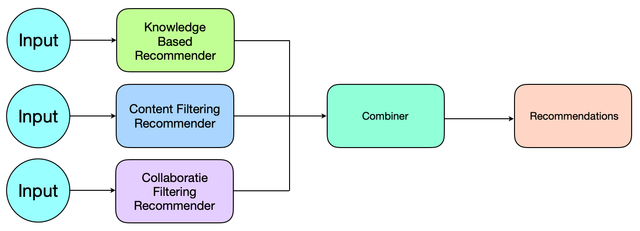

Hybrid Recommender Systems is a method that combines content-based filtering and collaborative filtering techniques to provide better recommendations in a recommendation system.

In a traditional recommendation system, content-based filtering focuses on content similarity between targets, while collaborative filtering is based on interactions between users and targets. Each method has its own advantages and limitations.

In [ ]:
df.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,status,title,vote_average,vote_count,release_year,keywords,cast,director,year,tags
0,1,30000000.0,"[Animation, Comedy, Family]",862,en,"[Led, by, Woody,, Andy's, toys, live, happily,...",21.946943,[Pixar Animation Studios],[US],1995-10-30,...,Released,Toy Story,7.7,5415.0,1995.0,"[jealousy, toy, boy]","[TomHanks, TimAllen, DonRickles]",[JohnLasseter],1995,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844,en,"[When, siblings, Judy, and, Peter, discover, a...",17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,...,Released,Jumanji,6.9,2413.0,1995.0,"[boardgame, disappearance, basedonchildren'sbook]","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],1995,"[When, siblings, Judy, and, Peter, discover, a..."
2,1,NaN,"[Romance, Comedy]",15602,en,"[A, family, wedding, reignites, the, ancient, ...",11.712900,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,...,Released,Grumpier Old Men,6.5,92.0,1995.0,"[fishing, bestfriend, duringcreditsstinger]","[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],1995,"[A, family, wedding, reignites, the, ancient, ..."


In [ ]:
R = df['vote_average']
v = df['vote_count']
# We will only consider movies that have more votes than at least 80% of the movies in our dataset
m = df['vote_count'].quantile(0.8)
C = df['vote_average'].mean()

df['weighted_average'] = (R*v + C*m)/(v+m)

<ipython-input-145-3c29be70ee38>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['popularity', 'weighted_average']])
weighted_df = pd.DataFrame(scaled, columns=['popularity', 'weighted_average'])

weighted_df.index = df['title']

In [ ]:
weighted_df

,popularity,weighted_average
title,,
Toy Story,0.040087,0.786182
Jumanji,0.031079,0.575815
Grumpier Old Men,0.021394,0.460196
Waiting to Exhale,0.007049,0.449749
Father of the Bride Part II,0.015320,0.408682
...,...,...
Pokémon: Spell of the Unknown,0.011837,0.432694
Pokémon 4Ever: Celebi - Voice of the Forest,0.011105,0.429223
Pokémon 4Ever: Celebi - Voice of the Forest,0.011105,0.429223


People watch a movie not just because they see a good rating for that movie, but also because of the hype of certain movie. So, in this case, put popularity into a consideration is a wise choice

Let's take 40% weight for weigthed average and 60% weight for popularity considering people don't want to miss a hype movie even the reviews and ratings are poor. You can play around with the number. Next up, we create a new column called score which stores the result

In [ ]:
weighted_df['score'] = weighted_df['weighted_average']*0.4 + weighted_df['popularity'].astype('float64')*0.6

In [ ]:
weighted_df_sorted = weighted_df.sort_values(by='score', ascending=False)
weighted_df_sorted.head(10)

,popularity,weighted_average,score
title,,,
Minions,1.000000,0.464996,0.785999
Big Hero 6,0.390602,0.815119,0.560409
Pulp Fiction,0.257449,0.950100,0.534509
The Dark Knight,0.224968,0.958161,0.518245
Gone Girl,0.282748,0.838857,0.505192
Deadpool,0.343132,0.724116,0.495525
Avatar,0.338036,0.672928,0.471993
The Shawshank Redemption,0.094332,1.000000,0.456599
Fight Club,0.116659,0.952932,0.451168


We already got the first result of our recommender system, but we don't stop right here

As mentioned earlier, we will combine those score with the similarity score

In [ ]:
hybrid_df = df[['title', 'genres', 'overview', 'production_companies', 'keywords', 'director', 'cast']]

In [ ]:
import re
import string
def separate(text):
    clean_text = []
    for t in text.split(','):
        cleaned = re.sub('\(.*\)', '', t) # Remove text inside parentheses
        cleaned = cleaned.translate(str.maketrans('','', string.digits))
        cleaned = cleaned.replace(' ', '')
        cleaned = cleaned.translate(str.maketrans('','', string.punctuation)).lower()
        clean_text.append(cleaned)
    return ' '.join(clean_text)

def remove_punc(text):
    cleaned = text.translate(str.maketrans('','', string.punctuation)).lower()
    clean_text = cleaned.translate(str.maketrans('','', string.digits))
    return clean_text

In [ ]:
hybrid_df = new_df[['title','tags']]
hybrid_df['tags'] = hybrid_df[hybrid_df.columns[1:]].apply(lambda x: ' '.join(x), axis=1)
hybrid_df.set_index('title', inplace=True)
hybrid_df.head(5)

<ipython-input-152-7b9ec253ec15>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tags
title,
Toy Story,"led by woody, andy' toy live happili in hi roo..."
Jumanji,when sibl judi and peter discov an enchant boa...
Grumpier Old Men,a famili wed reignit the ancient feud between ...
Waiting to Exhale,"cheat on, mistreat and step on, the women are ..."
Father of the Bride Part II,just when georg bank ha recov from hi daughter...


A common method to find similarity between 2 movies is a method called cosine similarity. There are of course a bunch of methods that you can try such as euclidean and sigmoidto know which one performs best

However, calculate similarity for all the movies require an expensive resources. So, because we have limited memory, we only take the first 10000 movies from weighted_df_sorted

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
hybrid_df = weighted_df_sorted[:10000].merge(hybrid_df, left_index=True, right_index=True, how='left')

tfidf = TfidfVectorizer(stop_words='english', min_df=5)
tfidf_matrix = tfidf.fit_transform(hybrid_df['tags'])
tfidf_matrix.shape

(10384, 9880)

In [ ]:
cos_sim = cosine_similarity(tfidf_matrix)
cos_sim.shape

(10384, 10384)

In [ ]:
hybrid_df

,popularity,weighted_average,score,tags
title,,,,
$9.99,0.006120,0.449052,0.183293,"have you ever wonder ""what is the mean of life..."
'Neath the Arizona Skies,0.000628,0.441471,0.176965,"chri morrell, the guardian of half-indian girl..."
"'night, Mother",0.001458,0.452361,0.181819,it happen in 1983. it wa a rare and remark the...
(500) Days of Summer,0.029912,0.649347,0.277686,"tom (joseph gordon-levitt), greeting-card writ..."
...And God Created Woman,0.005995,0.450816,0.183924,"juliett hardi is sexual dynamite, and ha the m..."
...,...,...,...,...
À Nous la Liberté,0.002208,0.462875,0.186475,"one of the all-tim comedi classics, rené clair..."
Æon Flux,0.022287,0.302277,0.134283,"400 year into the future, diseas ha wipe out t..."
İtirazım Var,0.000851,0.457689,0.183586,drama action crime serkankeskin büşrapekin haz...


In [ ]:
def predict(title, similarity_weight=0.7, top_n=10):
    data = hybrid_df.reset_index()
    index_movie = data[data['title'] == title].index
    similarity = cos_sim[index_movie].T

    sim_df = pd.DataFrame(similarity, columns=['similarity'])
    final_df = pd.concat([data, sim_df], axis=1)
    # You can also play around with the number
    final_df['final_score'] = final_df['score']*(1-similarity_weight) + final_df['similarity']*similarity_weight

    final_df_sorted = final_df.sort_values(by='final_score', ascending=False).head(top_n)
    final_df_sorted.set_index('title', inplace=True)
    return final_df_sorted[['score', 'similarity', 'final_score']]

In [ ]:
hybrid_df.reset_index()

,title,popularity,weighted_average,score,tags
0,$9.99,0.006120,0.449052,0.183293,"have you ever wonder ""what is the mean of life..."
1,'Neath the Arizona Skies,0.000628,0.441471,0.176965,"chri morrell, the guardian of half-indian girl..."
2,"'night, Mother",0.001458,0.452361,0.181819,it happen in 1983. it wa a rare and remark the...
3,(500) Days of Summer,0.029912,0.649347,0.277686,"tom (joseph gordon-levitt), greeting-card writ..."
4,...And God Created Woman,0.005995,0.450816,0.183924,"juliett hardi is sexual dynamite, and ha the m..."
...,...,...,...,...,...
10379,À Nous la Liberté,0.002208,0.462875,0.186475,"one of the all-tim comedi classics, rené clair..."
10380,Æon Flux,0.022287,0.302277,0.134283,"400 year into the future, diseas ha wipe out t..."
10381,İtirazım Var,0.000851,0.457689,0.183586,drama action crime serkankeskin büşrapekin haz...
10382,Želary,0.003762,0.460109,0.186301,a nurs and her surgeon-lov are part of a resis...


In [ ]:
predict('Toy Story', similarity_weight=0.7, top_n=10)

,score,similarity,final_score
title,,,
Toy Story,0.338525,1.000000,0.801557
Toy Story 3,0.321652,0.500932,0.447148
Toy Story 2,0.291260,0.469344,0.415918
Minions,0.785999,0.031163,0.257614
Toy Story of Terror!,0.215825,0.240283,0.232945
Rebel Without a Cause,0.249064,0.178023,0.199335
Big Hero 6,0.560409,0.018670,0.181192
For Your Consideration,0.190986,0.161998,0.170694
Malice,0.183932,0.161769,0.168418


***We see that for our hybrid recommender, we get different recommendations for different users although the movie is the same. Hence, our recommendations are more personalized and tailored towards particular users.***

# **CHAPTER 4: EVALUATION AND CONCLUSION**

## **EVALUATION**

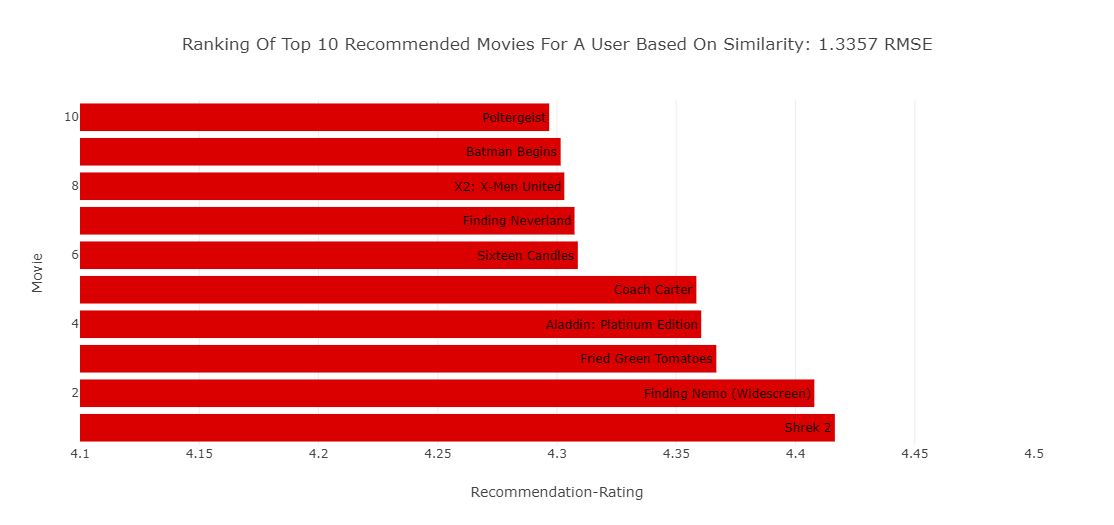

In [ ]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8817  0.8963  0.8774  0.8869  0.8807  0.8846  0.0066  
MAE (testset)     0.6785  0.6861  0.6719  0.6820  0.6784  0.6794  0.0047  
Fit time          4.38    4.26    4.56    4.39    4.38    4.39    0.09    
Test time         0.77    0.68    0.74    0.72    0.70    0.72    0.03    


{'test_rmse': array([0.88167324, 0.89625657, 0.87736352, 0.88689653, 0.88068204]),
 'test_mae': array([0.67845704, 0.68609127, 0.67186167, 0.68199671, 0.67836251]),
 'fit_time': (4.3769636154174805,
  4.261913537979126,
  4.555318117141724,
  4.390695333480835,
  4.382453203201294),
 'test_time': (0.7674388885498047,
  0.681363582611084,
  0.7443935871124268,
  0.7170441150665283,
  0.6963849067687988)}

## **CONCLUSION**

1. Demographic Filtering:

**Advantages:** Easy to implement, doesn't require user's detailed personal information, can make recommendations based on popularity of movies.

**Limitations:** Do not consider user's personal preferences, suggestions are not personalized. Anyone who queries our tool for recommendations based on a movie will get the same recommendations for that movie, no matter who she/he is.

2. Content-based Filtering:

**Advantages:** Suggestions based on similarity of movies, can be personalized based on user preferences, independent of information from other users.

**Constraints:** Mainly based on the description and attributes of the movie, does not consider the interaction between the user and the movie.

3. Collaborative Filtering:

- User-based Collaborative Filtering:

**Advantage:** Based on similarity between users, has the ability to recommend movies based on similarity to a group of users with similar interests.

**Limits:** Requires user reviews, difficult to deal with new users and "cold start" problem.

- Item-based Collaborative Filtering:

**Pros:** Based on similarity between movies, has the ability to suggest similar movies based on user interaction with previous movies.

**Limits:** Requires user reviews, difficult to deal with new movies and "cold start" problem.

- Model-Based Collaborative Filtering (SVD++):

**Advantages:** Uses machine learning models to learn and recommend movies, overcomes the "cold start" problem, and has good personalization.

**Constraints:** Requires large amounts of data, takes a long time to build and train models.

4. Hybrid Recommender:

**Advantages:** Combine different suggestion methods to provide more diverse and accurate suggestions, capable of overcoming the limitations of each method.

**Limits:** More complex in implementation and optimization, requires knowledge of many suggested methods.

**Conclusion and development direction:**

**Conclusion:** The Movie Recommendation System project combines many suggestion methods to provide diverse and personalized movie recommendations for users. Methods like Demographic Filtering, Content-based Filtering, Collaborative Filtering and Hybrid Recommender all have their own advantages and limitations.

**Development direction:** To improve the performance and quality of suggestions, the project can be improved in the following directions:
- Combine other suggestion methods such as Knowledge-based Filtering, Sequential Recommendation, Deep Learning-based Recommendation to increase the diversity and accuracy of suggestions.
Use data processing techniques like Natural Language Processing (NLP) to better leverage information from movie descriptions or user reviews.
- Optimized existing suggestion methods to improve processing speed and scalability.
- Implement a user-account management system from which to collect customer behavior to improve the recommendation system

# **CHAPTER 5: TESTING AND DEPLOYMENT**

Build an application using the results of mining
data to clarify the application of the problem in practice. **văn bản in đậm**

This application provides all the details of the requested movie such as overview, genre, release date, rating, runtime, top cast, reviews, recommended movies, etc.

The details of the movies(title, genre, runtime, rating, poster, etc) are fetched using an API by TMDB, https://www.themoviedb.org/documentation/api, and using the IMDB id of the movie in the API, I did web scraping to get the reviews given by the user in the IMDB site using beautifulsoup4 and performed sentiment analysis on those reviews.

* Python, Ajax
* Framework: FLask
* Front End: HTML/CSS/JS
* API: TMDB
* Content-based + Sentiment analysis

[Link to the application](https://github.com/nqkhanh2002/Movie-Recommendation-System)

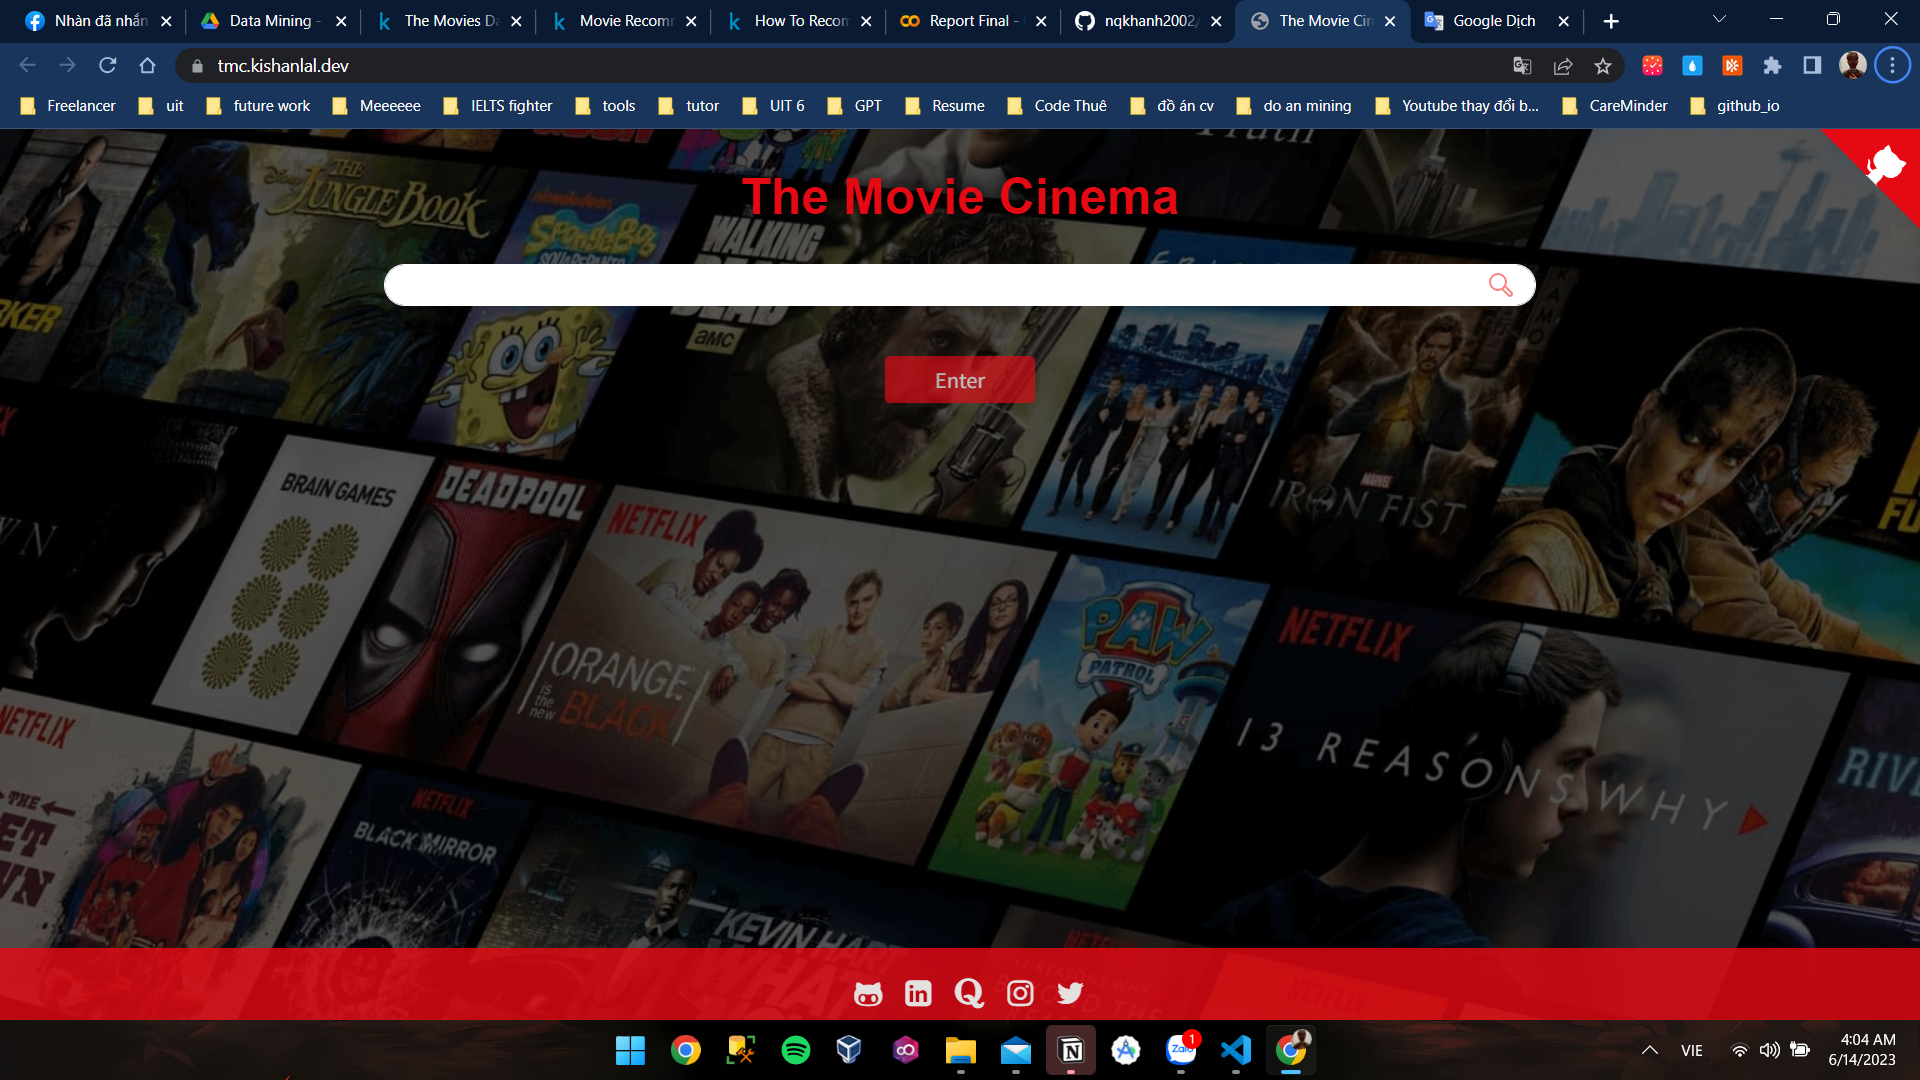